In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def cplx_linear(p, n, m):
    return min(2*m*n, (2*p-1)*n + (2*m-1)*p + m)

In [3]:
def cplx_gp(m, N = 10000):
    return (2*N-1)*m + N

In [4]:
PCANetNS = pd.read_csv("data/PCA_NS.csv", header = None).to_numpy()
DeepONetNS = pd.read_csv("data/DeepONet_NS.csv", header = None).to_numpy()
ParaNS = pd.read_csv("data/PARA_NS.csv", header = None).to_numpy()
FNONS = pd.read_csv("data/FNO_NS.csv", header = None).to_numpy()

PCANetHH = pd.read_csv("data/PCA_Helmhotz.csv", header = None).to_numpy()
DeepONetHH = pd.read_csv("data/DeepONet_Helmhotz.csv", header = None).to_numpy()
ParaHH = pd.read_csv("data/PARA_Helmhotz.csv", header = None).to_numpy()
FNOHH = pd.read_csv("data/FNO_Helmhotz.csv", header = None).to_numpy()

PCANetSM = pd.read_csv("data/PCA_Solid.csv", header = None).to_numpy()
DeepONetSM = pd.read_csv("data/DeepONet_Solid.csv", header = None).to_numpy()
ParaSM = pd.read_csv("data/PARA_Solid.csv", header = None).to_numpy()
FNOSM = pd.read_csv("data/FNO_Solid.csv", header = None).to_numpy()

PCANetAD = pd.read_csv("data/PCA_Adv.csv", header = None).to_numpy()
DeepONetAD = pd.read_csv("data/DeepONet_Adv.csv", header = None).to_numpy()
ParaAD = pd.read_csv("data/PARA_Adv.csv", header = None).to_numpy()
FNOAD = pd.read_csv("data/FNO_Adv.csv", header = None).to_numpy()

In [5]:
def cplx_gp_pca(n, m, p_in, p_out, N = 10000):
    return (2*p_in-1)*n + (2*N-1)*p_out + (2*m-1)*p_out + N*p_in


def cplx_gp_pca2(n, m, p_out, N = 10000):
    return (2*N-1)*p_out + (2*m-1)*p_out + N*n

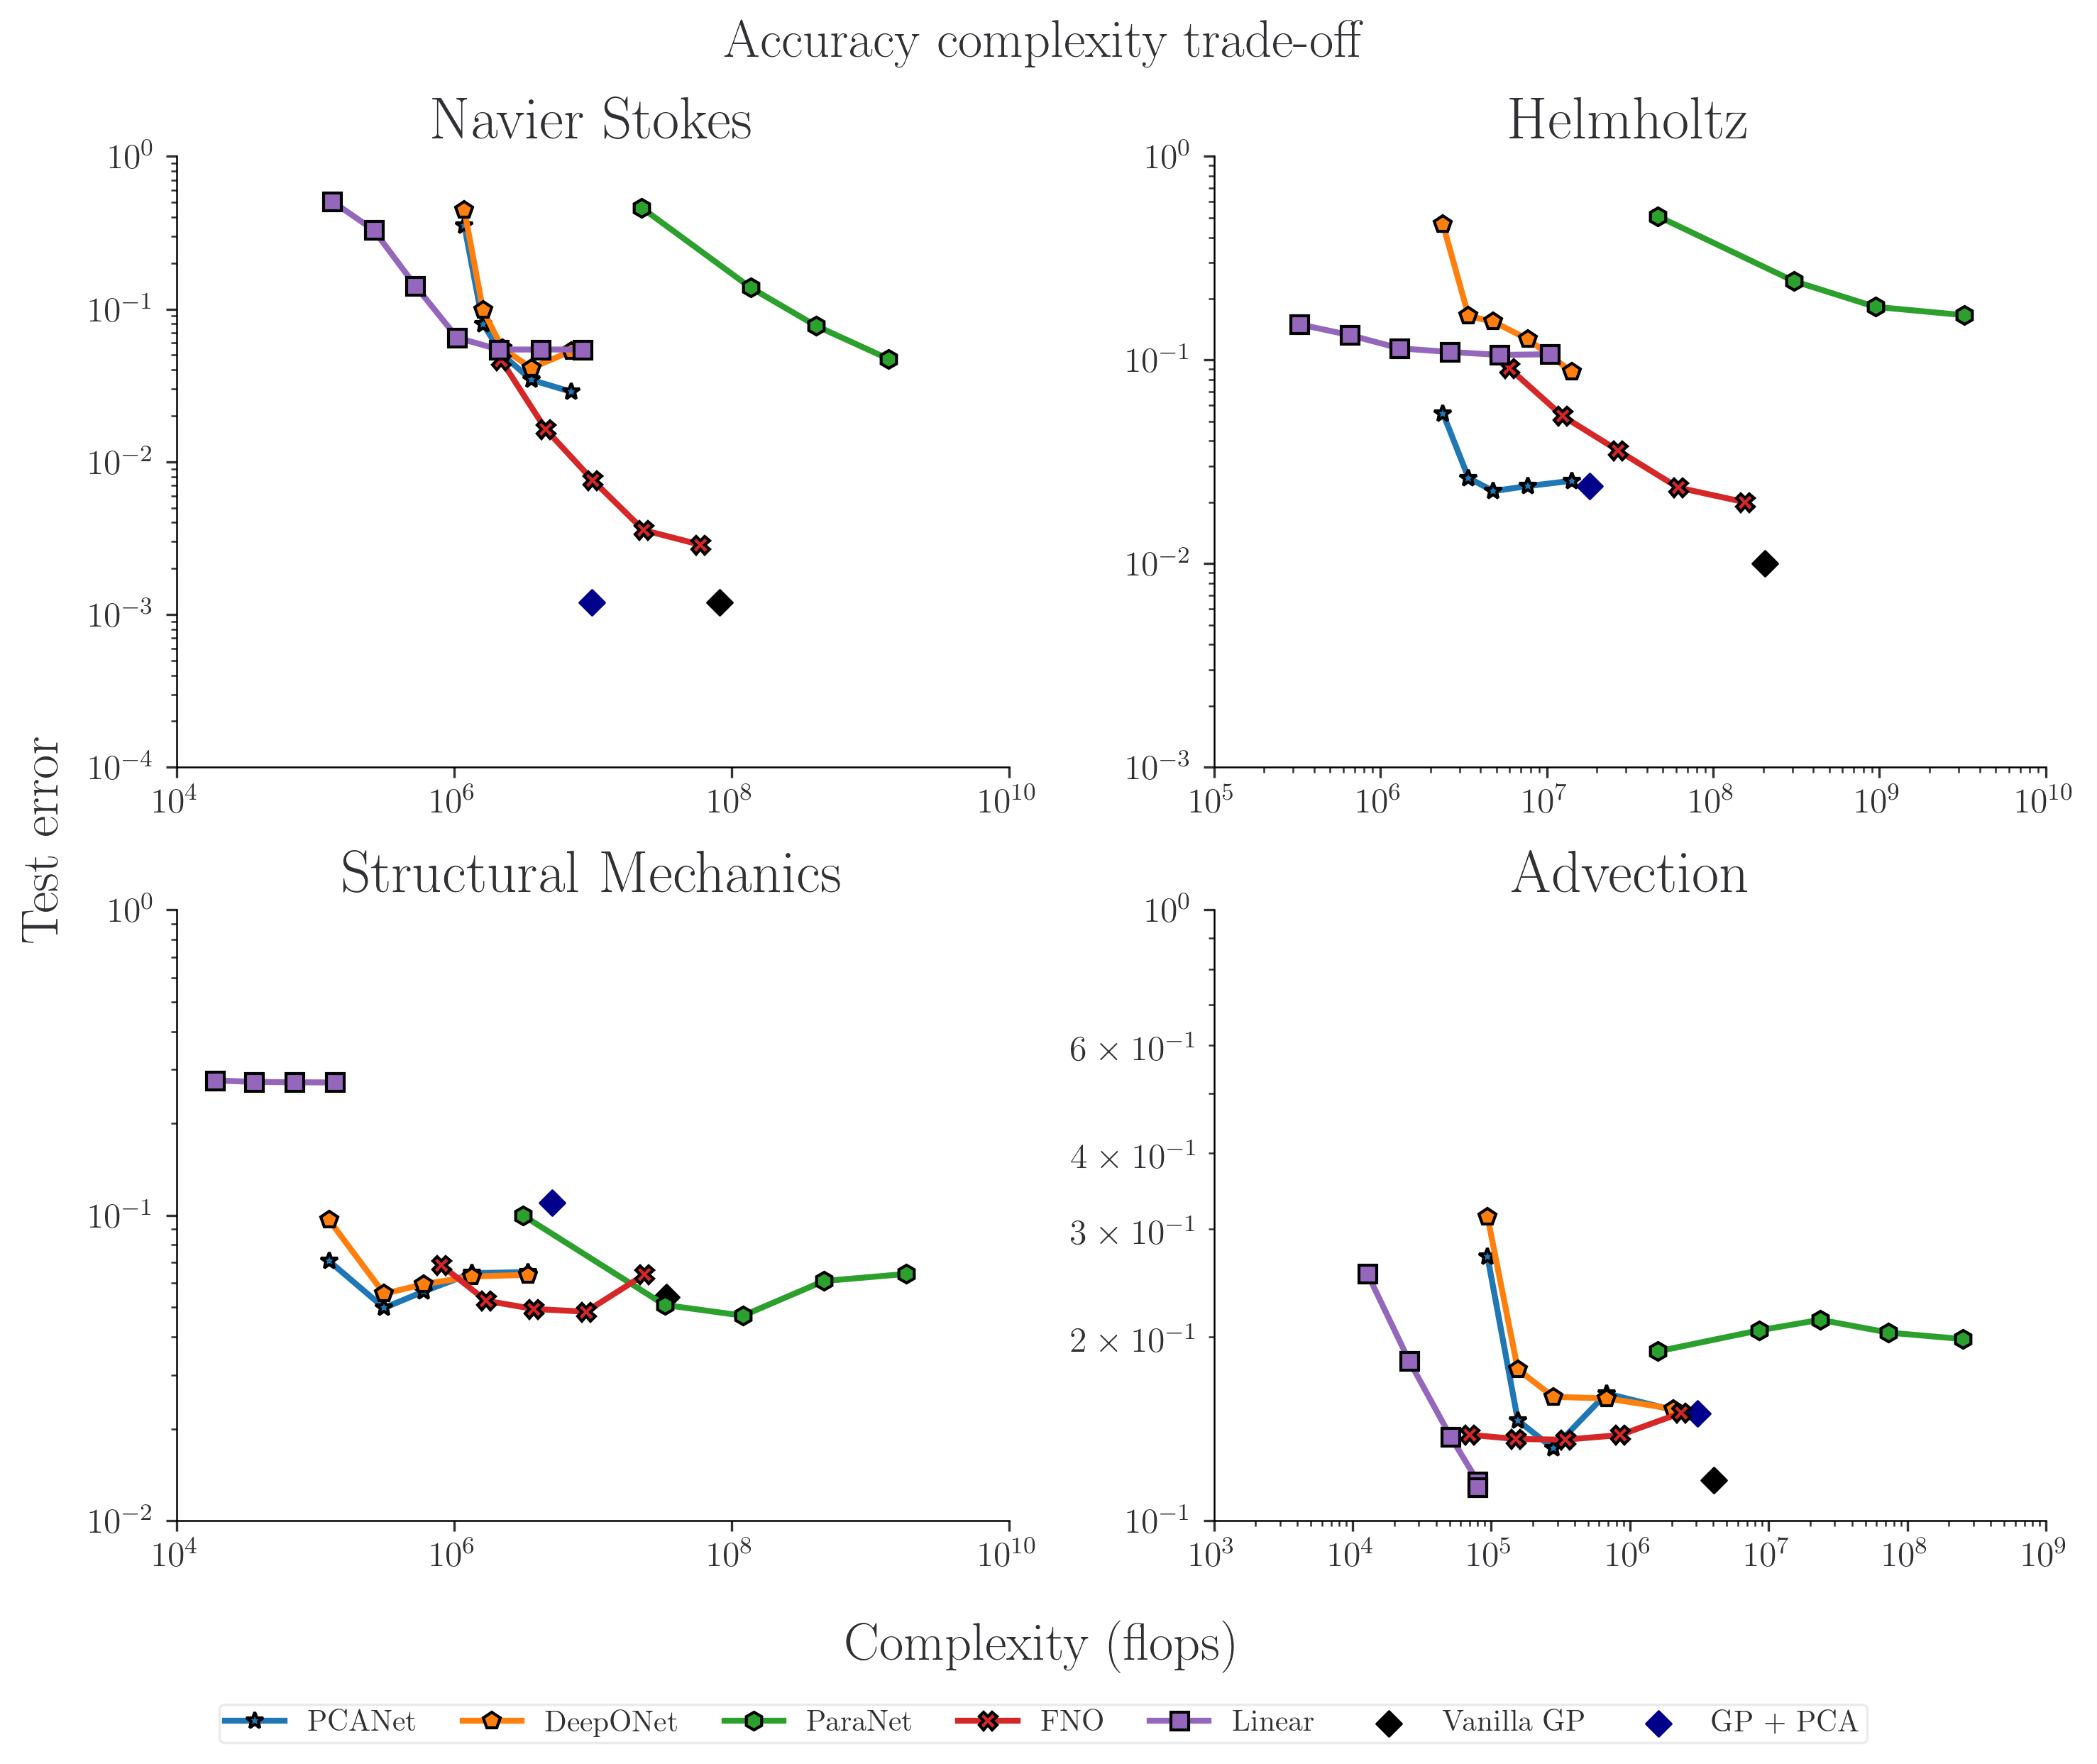

In [7]:
plt.style.use('plot_style-coolwarm.txt')

fig, ax = plt.subplots(2,2, figsize = (10,8))
#Navier Stokes


ax[0,0].set_title(r'Navier Stokes', loc = 'center')
ax[0,0].plot(PCANetNS[PCANetNS[:,0] == 10000][:,2], PCANetNS[PCANetNS[:,0] == 10000][:, 4], '-*', label = 'PCANet')
ax[0,0].plot(DeepONetNS[DeepONetNS[:,0] == 10000][:,2], DeepONetNS[DeepONetNS[:,0] == 10000][:, 4], '-p', label = 'DeepONet')
ax[0,0].plot(ParaNS[ParaNS[:,0] == 10000][:4,2], ParaNS[ParaNS[:,0] == 10000][:4, 4], '-h', label = 'Para')
ax[0,0].plot(FNONS[FNONS[:,0] == 10000][:,2], FNONS[FNONS[:,0] == 10000][:, 4], '-X', label = 'FNO')
resultspca = [[8, 0.5086471004988675],
 [16, 0.32902767742497485],
 [32, 0.1417764805416794],
 [64, 0.06491252235537232],
 [128, 0.05433896061902034],
 [256, 0.054339492288471514],
 [512, 0.05433913950959782]]

ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].plot([cplx_linear(i, 64*64,64*64) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-s', label = 'Linear + PCA')
ax[0,0].scatter([cplx_gp(64*64)], [0.0012], color = 'black', marker ='D', label = 'GP')
ax[0,0].scatter([cplx_gp_pca(n=64*64, m = 64*64, p_in = 128, p_out = 128, N=20000)], [0.0012], color = 'darkblue', marker ='D', label = 'GP20k')



#Helmholtz


ax[0,1].set_title(r'Helmholtz', loc = 'center')
ax[0,1].plot(PCANetHH[PCANetHH[:,0] == 10000][:,2], PCANetHH[PCANetHH[:,0] == 10000][:, 4], '-*', label = 'PCANet')
ax[0,1].plot(DeepONetHH[DeepONetHH[:,0] == 10000][:,2], DeepONetHH[DeepONetHH[:,0] == 10000][:, 4], '-p', label = 'DeepONet')
ax[0,1].plot(ParaHH[ParaHH[:,0] == 10000][:4,2], ParaHH[ParaHH[:,0] == 10000][:4, 4], '-h', label = 'Para')
ax[0,1].plot(FNOHH[FNOHH[:,0] == 10000][:,2], FNOHH[FNOHH[:,0] == 10000][:, 4], '-X', label = 'FNO')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
resultspca = [[8, 0.14960297462671757],
 [16, 0.13260202963830026],
 [32, 0.1140852985756796],
 [64, 0.10946473627559893],
 [128, 0.10592485656461126],
 [256, 0.10669036765776628]]

ax[0,1].plot([cplx_linear(i, 101*101,101*101) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-s', label = 'Linear')
ax[0,1].scatter([cplx_gp(101*101)], [0.010], marker ='D', color = 'black', label = 'GP')
ax[0,1].scatter([cplx_gp_pca(n=101*101, m = 101*101, p_in = 200, p_out = 300, N = 10000)], [0.024], marker ='D', color = 'darkblue', label = 'GP')

#ax[0,1].scatter([cplx_gp_pca(n=101*101, m = 101*101, p_in = 200, p_out = 500)], [0.024], marker ='D', color = 'darkblue', label = 'GP')


#Structural Mechanics


ax[1,0].set_title(r'Structural Mechanics', loc = 'center')
ax[1,0].plot(PCANetSM[PCANetSM[:,0] == 10000][:,2], PCANetSM[PCANetSM[:,0] == 10000][:, 4], '-*', label = 'PCANet')
ax[1,0].plot(DeepONetSM[DeepONetSM[:,0] == 10000][:,2], DeepONetSM[DeepONetSM[:,0] == 10000][:, 4], '-p', label = 'DeepONet')
ax[1,0].plot(ParaSM[ParaSM[:,0] == 10000][:,2], ParaSM[ParaSM[:,0] == 10000][:, 4], '-h', label = 'Para')
ax[1,0].plot(FNOSM[FNOSM[:,0] == 10000][:,2], FNOSM[FNOSM[:,0] == 10000][:, 4], '-X', label = 'FNO')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

resultspca = [[5, 0.2765221088188129],
 [10, 0.2734173270367],
 [20, 0.27266866934847744],
 [40, 0.2723498953506888]]
ax[1,0].plot([cplx_linear(i, 41, 41*41) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-s', label = 'Linear')
ax[1,0].scatter([cplx_gp(41*41)], [0.054], marker ='D', color = 'black', label = 'GP')
ax[1,0].scatter([cplx_gp_pca2(n=41, m = 41*41, p_out = 200, N = 10000)], [0.11], marker ='D', color = 'darkblue', label = 'GP')

#Advection


ax[1,1].set_title(r'Advection', loc = 'center')
ax[1,1].plot(PCANetAD[PCANetAD[:,0] == 10000][:,2], PCANetAD[PCANetAD[:,0] == 10000][:, 4], '-*', label = 'PCANet')
ax[1,1].plot(DeepONetAD[DeepONetAD[:,0] == 10000][:,2], DeepONetAD[DeepONetAD[:,0] == 10000][:, 4], '-p', label = 'DeepONet')
ax[1,1].plot(ParaAD[ParaAD[:,0] == 10000][:,2], ParaAD[ParaAD[:,0] == 10000][:, 4], '-h', label = 'ParaNet')
ax[1,1].plot(FNOAD[FNOAD[:,0] == 10000][:,2], FNOAD[FNOAD[:,0] == 10000][:, 4], '-X', label = 'FNO')

#From other notebook
resultspca = [[16, 0.2539750558073611],
 [32, 0.18283896775861255],
 [64, 0.1371020695289114],
 [128, 0.11594513618759306],
 [200, 0.11341718064240679]]

ax[1,1].plot([cplx_linear(i, 200, 200) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-s', label = 'Linear')
ax[1,1].scatter([cplx_gp(200)], [0.11639013233030239], color = 'black', marker ='D', label = 'Vanilla GP')
ax[1,1].scatter([cplx_gp_pca(n = 200, m = 200, p_in = 100, p_out = 100, N = 10000)], [0.15], color = 'darkblue', marker ='D', label = 'GP + PCA')

ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')

lines_labels = [ax[1,1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.supxlabel(r'Complexity (flops)')
fig.supylabel(r'Test error')
ttl = fig.suptitle(r'Accuracy complexity trade-off')
plt.tight_layout()
lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor = (0.5,0,0,0), ncol=7)
plt.savefig('AccuracyComplexity.pdf', dpi = 500, bbox_inches = 'tight')#bbox_extra_artists=(lgd,),

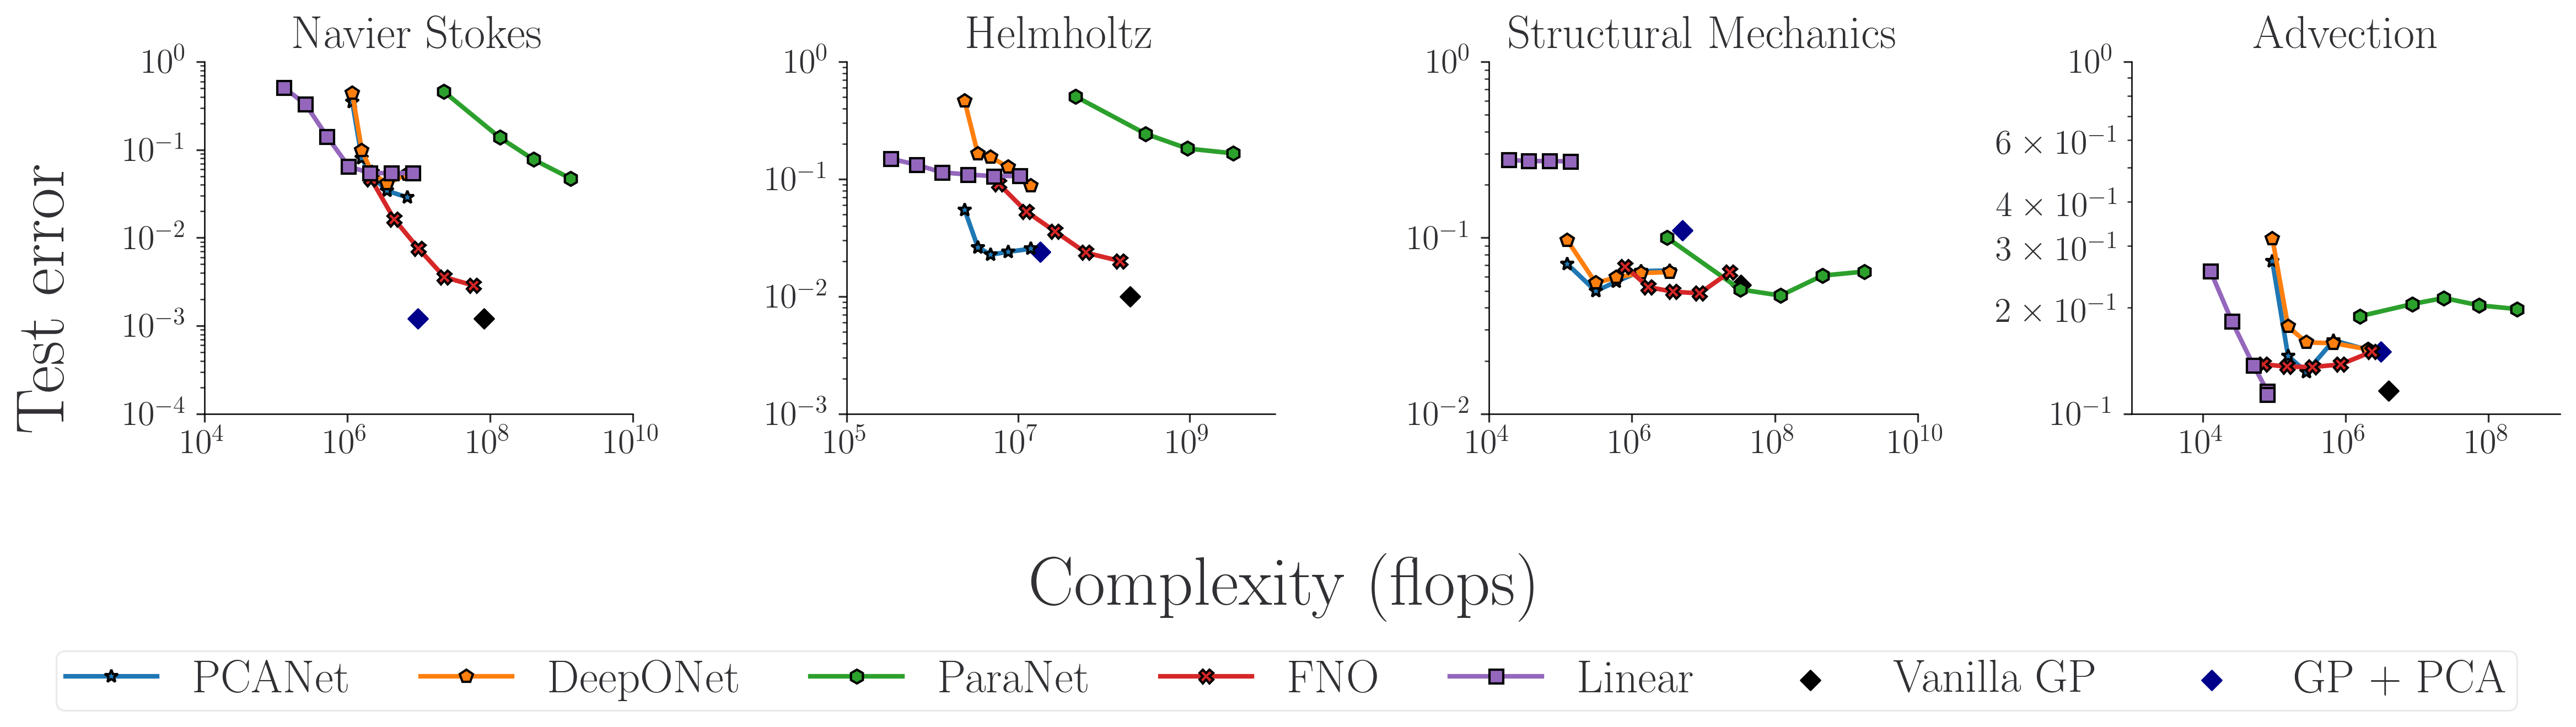

In [24]:
#4 in one row

plt.style.use('plot_style-coolwarm.txt')

fig, ax = plt.subplots(1, 4, figsize = (16,4))
#Navier Stokes
ax = np.array([[ax[0], ax[1]], [ax[2], ax[3]]])

ax[0,0].set_title(r'Navier Stokes', loc = 'center')
ax[0,0].plot(PCANetNS[PCANetNS[:,0] == 10000][:,2], PCANetNS[PCANetNS[:,0] == 10000][:, 4], '-*', label = 'PCANet')
ax[0,0].plot(DeepONetNS[DeepONetNS[:,0] == 10000][:,2], DeepONetNS[DeepONetNS[:,0] == 10000][:, 4], '-p', label = 'DeepONet')
ax[0,0].plot(ParaNS[ParaNS[:,0] == 10000][:4,2], ParaNS[ParaNS[:,0] == 10000][:4, 4], '-h', label = 'Para')
ax[0,0].plot(FNONS[FNONS[:,0] == 10000][:,2], FNONS[FNONS[:,0] == 10000][:, 4], '-X', label = 'FNO')
resultspca = [[8, 0.5086471004988675],
 [16, 0.32902767742497485],
 [32, 0.1417764805416794],
 [64, 0.06491252235537232],
 [128, 0.05433896061902034],
 [256, 0.054339492288471514],
 [512, 0.05433913950959782]]

ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].plot([cplx_linear(i, 64*64,64*64) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-s', label = 'Linear + PCA')
ax[0,0].scatter([cplx_gp(64*64)], [0.0012], color = 'black', marker ='D', label = 'GP')
ax[0,0].scatter([cplx_gp_pca(n=64*64, m = 64*64, p_in = 128, p_out = 128, N=20000)], [0.0012], color = 'darkblue', marker ='D', label = 'GP20k')



#Helmholtz


ax[0,1].set_title(r'Helmholtz', loc = 'center')
ax[0,1].plot(PCANetHH[PCANetHH[:,0] == 10000][:,2], PCANetHH[PCANetHH[:,0] == 10000][:, 4], '-*', label = 'PCANet')
ax[0,1].plot(DeepONetHH[DeepONetHH[:,0] == 10000][:,2], DeepONetHH[DeepONetHH[:,0] == 10000][:, 4], '-p', label = 'DeepONet')
ax[0,1].plot(ParaHH[ParaHH[:,0] == 10000][:4,2], ParaHH[ParaHH[:,0] == 10000][:4, 4], '-h', label = 'Para')
ax[0,1].plot(FNOHH[FNOHH[:,0] == 10000][:,2], FNOHH[FNOHH[:,0] == 10000][:, 4], '-X', label = 'FNO')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
resultspca = [[8, 0.14960297462671757],
 [16, 0.13260202963830026],
 [32, 0.1140852985756796],
 [64, 0.10946473627559893],
 [128, 0.10592485656461126],
 [256, 0.10669036765776628]]

ax[0,1].plot([cplx_linear(i, 101*101,101*101) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-s', label = 'Linear')
ax[0,1].scatter([cplx_gp(101*101)], [0.010], marker ='D', color = 'black', label = 'GP')
ax[0,1].scatter([cplx_gp_pca(n=101*101, m = 101*101, p_in = 200, p_out = 300, N = 10000)], [0.024], marker ='D', color = 'darkblue', label = 'GP')

#ax[0,1].scatter([cplx_gp_pca(n=101*101, m = 101*101, p_in = 200, p_out = 500)], [0.024], marker ='D', color = 'darkblue', label = 'GP')


#Structural Mechanics


ax[1,0].set_title(r'Structural Mechanics', loc = 'center')
ax[1,0].plot(PCANetSM[PCANetSM[:,0] == 10000][:,2], PCANetSM[PCANetSM[:,0] == 10000][:, 4], '-*', label = 'PCANet')
ax[1,0].plot(DeepONetSM[DeepONetSM[:,0] == 10000][:,2], DeepONetSM[DeepONetSM[:,0] == 10000][:, 4], '-p', label = 'DeepONet')
ax[1,0].plot(ParaSM[ParaSM[:,0] == 10000][:,2], ParaSM[ParaSM[:,0] == 10000][:, 4], '-h', label = 'Para')
ax[1,0].plot(FNOSM[FNOSM[:,0] == 10000][:,2], FNOSM[FNOSM[:,0] == 10000][:, 4], '-X', label = 'FNO')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

resultspca = [[5, 0.2765221088188129],
 [10, 0.2734173270367],
 [20, 0.27266866934847744],
 [40, 0.2723498953506888]]
ax[1,0].plot([cplx_linear(i, 41, 41*41) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-s', label = 'Linear')
ax[1,0].scatter([cplx_gp(41*41)], [0.054], marker ='D', color = 'black', label = 'GP')
ax[1,0].scatter([cplx_gp_pca2(n=41, m = 41*41, p_out = 200, N = 10000)], [0.11], marker ='D', color = 'darkblue', label = 'GP')

#Advection


ax[1,1].set_title(r'Advection', loc = 'center')
ax[1,1].plot(PCANetAD[PCANetAD[:,0] == 10000][:,2], PCANetAD[PCANetAD[:,0] == 10000][:, 4], '-*', label = 'PCANet')
ax[1,1].plot(DeepONetAD[DeepONetAD[:,0] == 10000][:,2], DeepONetAD[DeepONetAD[:,0] == 10000][:, 4], '-p', label = 'DeepONet')
ax[1,1].plot(ParaAD[ParaAD[:,0] == 10000][:,2], ParaAD[ParaAD[:,0] == 10000][:, 4], '-h', label = 'ParaNet')
ax[1,1].plot(FNOAD[FNOAD[:,0] == 10000][:,2], FNOAD[FNOAD[:,0] == 10000][:, 4], '-X', label = 'FNO')

#From other notebook
resultspca = [[16, 0.2539750558073611],
 [32, 0.18283896775861255],
 [64, 0.1371020695289114],
 [128, 0.11594513618759306],
 [200, 0.11341718064240679]]

ax[1,1].plot([cplx_linear(i, 200, 200) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-s', label = 'Linear')
ax[1,1].scatter([cplx_gp(200)], [0.11639013233030239], color = 'black', marker ='D', label = 'Vanilla GP')
ax[1,1].scatter([cplx_gp_pca(n = 200, m = 200, p_in = 100, p_out = 100, N = 10000)], [0.15], color = 'darkblue', marker ='D', label = 'GP + PCA')

ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')

lines_labels = [ax[1,1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.supxlabel(r'Complexity (flops)', fontsize = 30)
fig.supylabel(r'Test error', fontsize = 30)
#ttl = fig.suptitle(r'Accuracy complexity trade-off')
plt.tight_layout()
lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor = (0.5,0,0,0), ncol=7)
plt.savefig('AccuracyComplexity.pdf', dpi = 500, bbox_inches = 'tight')#bbox_extra_artists=(lgd,),